In [115]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [116]:
train_data = np.genfromtxt("/Users/prithvik/Documents/USC/Assignments/EE559/HW3/HW1_datasets/dataset2_train.csv", delimiter=',')
np.random.shuffle(train_data)
train_data_points = np.asarray(train_data[:,:2])
train_labels = train_data[:, 2]

test_data = np.genfromtxt("/Users/prithvik/Documents/USC/Assignments/EE559/HW1/HW1_datasets/dataset2_test.csv", delimiter=',')
test_data_points = np.asarray(test_data[:,:2])
test_labels = test_data[:, 2]

In [117]:
def GD(r_data_points, wi, eta=1, max_itr=10000):
    itr = 0
    epoch = 0
    Jw_min = 1000000000
    Jw_ar = []
    Jw = 0
    w_opt = 0.1*np.ones([3, 1])
    while itr < max_itr:
        Jw=0
        update_count = 0
        for i in range(len(r_data_points)):
            z = np.dot(wi.T, r_data_points[i, :])
            if z <= 0:
                wi = wi + eta * r_data_points[i, :].reshape([int(r_data_points.shape[1]), 1])
                update_count = 0
            else:
                update_count = update_count+1

            for j in range(len(r_data_points)):
                if np.dot(wi.T, r_data_points[j, :] < 0):
                    Jw = Jw - np.dot(wi.T, r_data_points[j, :])
            
            if Jw < Jw_min:
                Jw_min = Jw
                w_opt = wi
            Jw_ar.append(Jw.tolist()[0])

            itr = itr+1
        if update_count == 100:
            print("The data is linearly separable")
            break
        epoch = epoch + 1
    return w_opt, Jw_ar, itr

In [118]:
def test_classification(data, w):
    clas = np.zeros(len(data))
    for i in range(len(data)):
        pred = np.dot(w.T, data[i, :])
        if pred < 0:
            clas [i] = 2
        else:
            clas [i] = 1
    return clas

In [119]:
def error(tpl,tl):
    err_count = 0
    for i in range(len(tpl)):
        if (int(tpl[i]) != int(tl[i])):
            err_count = err_count+1
    err_rate = (err_count/len(tpl))*100
    return err_rate

In [120]:
def plot(data, label, w):
    x_min = min(data[:, 1])
    x_max = max(data[:, 1])
    x = np.linspace(x_min, x_max)
    y = -(w[0]+w[1]*x)/w[2]

    plt.plot(x, y, label='Decision Boundary')
    plt.fill_between(x, y, 4, color='blue', alpha=.5)
    plt.scatter(data[label == 1, 1], data[label == 1, 2],
                color='red', label='Class 1')
    plt.scatter(data[label == 2, 1], data[label == 2, 2],
                color='blue', label='Class 2')
    plt.legend()

The data is linearly separable
The Optimal weights are - [[-0.9        -0.09461439  1.65188401]]
The Classification Error Rate for Training Data = 0.0%


Text(0, 0.5, 'J(W)')

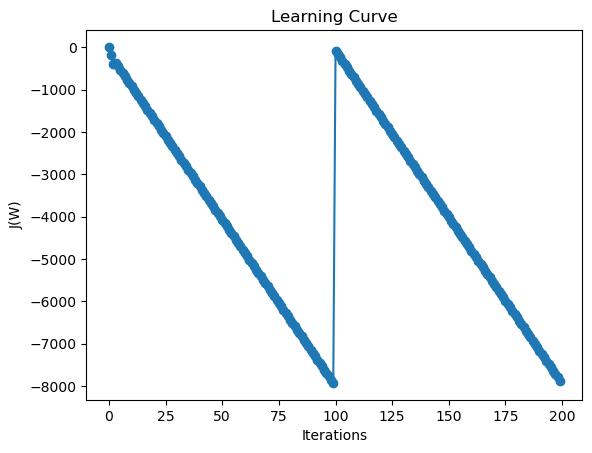

In [121]:
train_data_aug = np.vstack([np.ones([1, 100]), train_data_points.T]).T

reflected_data_points = np.copy(train_data_aug)

for i in range(len(train_data_points)):
    if train_data[i, 2] == 2.0:
        reflected_data_points[i, :] = reflected_data_points[i, :] * (-1)

w0 = 0.1 * np.ones([3, 1])

w_o, Jw_ar, itr = GD(reflected_data_points, w0)

print("The Optimal weights are - " + str(w_o.reshape(1,3)))

train_pred_labels = test_classification(train_data_aug, w_o)

print("The Classification Error Rate for Training Data = " + str(error(train_pred_labels,train_labels)) + "%")

itrs = len(Jw_ar)

plt.plot(list(range(itrs)),Jw_ar, marker = 'o')
plt.title("Learning Curve")
plt.xlabel("Iterations")
plt.ylabel("J(W)")

The Classification Error Rate for Test Data = 0.0%


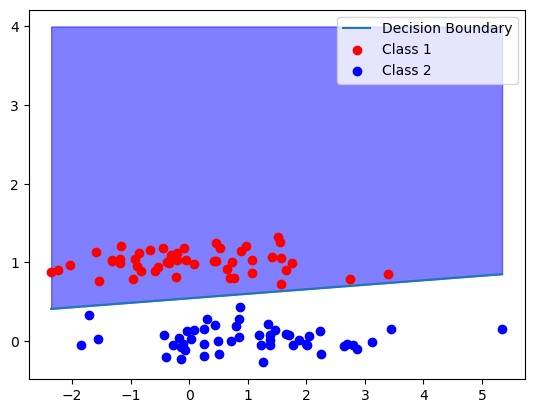

In [122]:
test_data_aug = np.vstack([np.ones([1, 100]), test_data_points.T]).T

test_pred_labels = test_classification(test_data_aug, w_o)

print("The Classification Error Rate for Test Data = " + str(error(test_pred_labels,test_labels)) + "%")

plot(test_data_aug,test_pred_labels,w_o)

In [123]:
bc_train_data = np.load("breast_cancer_train.npy")
np.random.shuffle(bc_train_data)
bc_train_data_points = np.asarray(bc_train_data[:,1:])
bc_train_labels = bc_train_data[:, 0]

bc_train_data_points = 100*normalize(bc_train_data_points, axis=0, norm='l1')

bc_test_data = np.load("breast_cancer_test.npy")
bc_test_data_points = np.asarray(bc_test_data[:,1:])
bc_test_labels = bc_test_data[:, 0]

The Classification Error Rate for Training Data = 1.875%


Text(0, 0.5, 'J(W)')

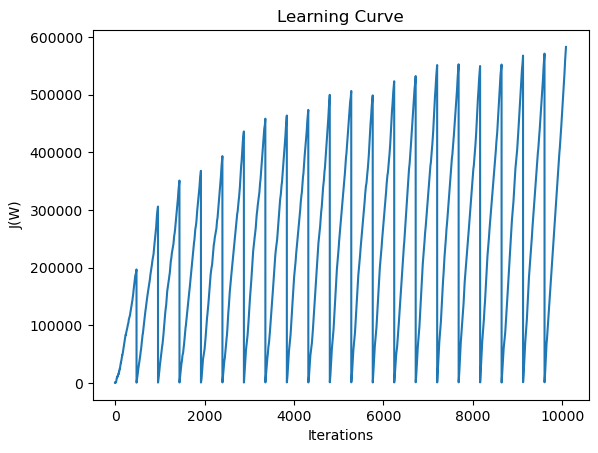

In [124]:
bc_train_data_aug = np.vstack([np.ones([1, 480]), bc_train_data_points.T]).T

bc_reflected_data_points = np.copy(bc_train_data_aug)

for i in range(len(bc_train_data_points)):
    if bc_train_data[i, 0] == 2.0:
        bc_reflected_data_points[i, :] = bc_reflected_data_points[i, :] * (-1)

w0 = 0.1 * np.ones([31, 1])

w_o, Jw_ar, itr = GD(bc_reflected_data_points, w0)

bc_train_pred_labels = test_classification(bc_train_data_aug, w_o)

print("The Classification Error Rate for Training Data = " + str(error(bc_train_pred_labels,bc_train_labels)) + "%")

itrs = len(Jw_ar)
for jw in range(len(Jw_ar)):
    Jw_ar[jw] = Jw_ar[jw] *(-1)

plt.plot(list(range(itrs)),Jw_ar)
plt.title("Learning Curve")
plt.xlabel("Iterations")
plt.ylabel("J(W)")

In [125]:
bc_test_data_aug = np.vstack([np.ones([1, 89]), bc_test_data_points.T]).T

bc_test_pred_labels = test_classification(bc_test_data_aug, w_o)

print("The Classification Error Rate for Test Data = " + str(error(bc_test_pred_labels,bc_test_labels)) + "%")

The Classification Error Rate for Test Data = 62.92134831460674%


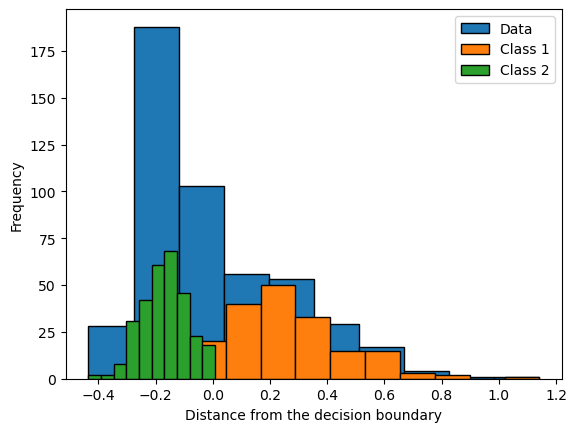

In [126]:
y = []
for i in range(len(bc_train_data_points)):
    x = np.dot(w_o.T, bc_train_data_aug[i, :])/np.linalg.norm(w_o)
    y.append([x])

y = np.asarray(y).reshape(480, 1)
c1 = y[bc_train_labels == 1]
c2 = y[bc_train_labels == 2]

plt.hist(y, label='Data', edgecolor='black')
plt.hist(c1, label='Class 1', edgecolor='black')
plt.hist(c2, label='Class 2', edgecolor='black')
plt.xlabel("Distance from the decision boundary")
plt.ylabel("Frequency")
plt.legend()